<a href="https://colab.research.google.com/github/mr-usurper/aura_vis/blob/main/aura_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
file = pd.read_excel('/content/sample_data/test.xlsx')
x = file['mood']
y = file['avg']
print(file)

   number  sadness  effect on life  anger  effect on life.1  excitement  \
0     1.0        8               6      2                 5           6   
1     2.0        3               1      1                 2           4   
2     3.0        5               9      9                 5           2   
3     4.0        9               9      4                 8           5   
4     5.0        9               7      3                 3           1   
5     6.0        7               7      9                 2           6   

   effect on life.2  tiredness  effect on life.3  calmness  effect on life.4  \
0                 6          7                 8         4                 6   
1                 6          2                 2         1                 9   
2                 1          7                 5         6                 3   
3                 4          5                10        10                 8   
4                 4          4                 6         9                

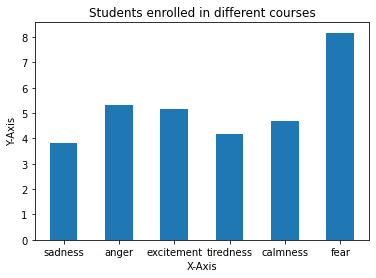

In [ ]:
plt.bar(x, y, width=0.5)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Students enrolled in different courses")
plt.show()

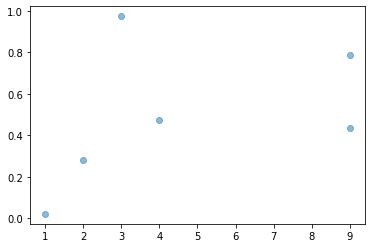

In [ ]:
file = pd.read_excel('/content/sample_data/test.xlsx')
x = file['anger']
#y = file['avg']
y = np.random.rand(6)
plt.scatter(x, y, alpha=0.5)
plt.show()

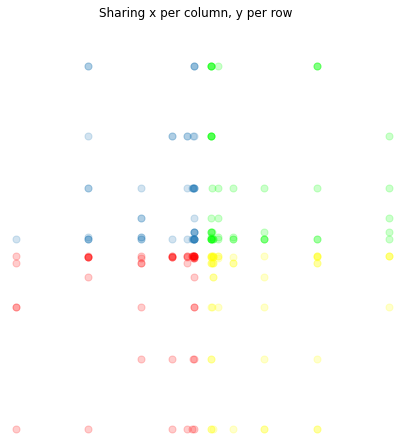

In [ ]:
file = pd.read_excel('/content/sample_data/test.xlsx')
x1 = file['sadness']
y1 = file['effect on life']
x2 = file['anger']
y2 = file['effect on life.2']
x3 = file['excitement']
y3 = file['effect on life.3']
x4 = file['tiredness']
y4 = file['effect on life.4']
fig = plt.figure(figsize=(7, 7))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
#ax1.plot(x, y)
ax1.scatter(x1, -y1, alpha = 0.2, s = 50)
ax2.scatter(-x2, -y2, alpha = 0.2, s = 50, c = '#00ff00')
ax3.scatter(x3, y3, alpha = 0.2, s = 50, c = '#ff0000')
ax4.scatter(-x4, y4, alpha = 0.2, s = 50, c = '#ffff00')
#ax2.plot(x, y, 'tab:orange')
#ax3.plot(x, y, 'tab:green')
#ax4.plot(x, y, 'tab:red')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

for ax in fig.get_axes():
    ax.label_outer()
    

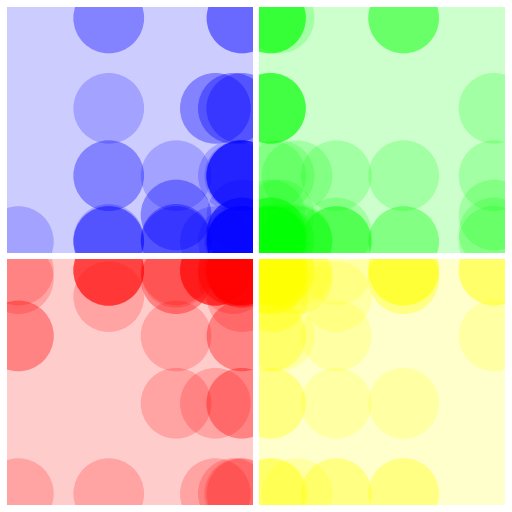

<Figure size 432x288 with 0 Axes>

In [ ]:
file = pd.read_excel('/content/sample_data/test.xlsx')
x1 = file['sadness']
y1 = file['effect on life']
x2 = file['anger']
y2 = file['effect on life.2']
x3 = file['excitement']
y3 = file['effect on life.3']
x4 = file['tiredness']
y4 = file['effect on life.4']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout = True)
fig.set_figheight(7)
fig.set_figwidth(7)
plt.figure(edgecolor = '#ffff00')

ax1.scatter(x1, -y1, alpha = 0.2, s = 5000, c = '#0000ff', edgecolors = 'none')
ax2.scatter(-x2, -y2, alpha = 0.2, s = 5000, c = '#00ff00', edgecolors = 'none')
ax3.scatter(x3, y3, alpha = 0.2, s = 5000, c = '#ff0000', edgecolors = 'none')
ax4.scatter(-x4, y4, alpha = 0.2, s = 5000, c = '#ffff00', edgecolors = 'none')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax4.get_xaxis().set_ticks([])
ax4.get_yaxis().set_ticks([])

color1 = "#0000ff33"
color2 = "#00ff0033"
color3 = "#ff000033"
color4 = "#ffff0033"

ax1.set_facecolor(color1)
ax2.set_facecolor(color2)
ax3.set_facecolor(color3)
ax4.set_facecolor(color4)

for ax in fig.get_axes():
    ax.label_outer()

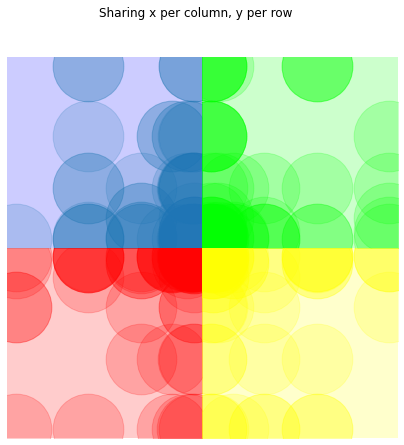

In [ ]:
file = pd.read_excel('/content/sample_data/test.xlsx')
x1 = file['sadness']
y1 = file['effect on life']
x2 = file['anger']
y2 = file['effect on life.2']
x3 = file['excitement']
y3 = file['effect on life.3']
x4 = file['tiredness']
y4 = file['effect on life.4']
fig = plt.figure(figsize=(7, 7))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.scatter(x1, -y1, alpha = 0.2, s = 5000)
ax2.scatter(-x2, -y2, alpha = 0.2, s = 5000, c = '#00ff00')
ax3.scatter(x3, y3, alpha = 0.2, s = 5000, c = '#ff0000')
ax4.scatter(-x4, y4, alpha = 0.2, s = 5000, c = '#ffff00')

ax1.set_facecolor("#0000ff33")
ax2.set_facecolor("#00ff0033")
ax3.set_facecolor("#ff000033")
ax4.set_facecolor("#ffff0033")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax4.get_xaxis().set_ticks([])
ax4.get_yaxis().set_ticks([])

for ax in fig.get_axes():
    ax.label_outer()
    

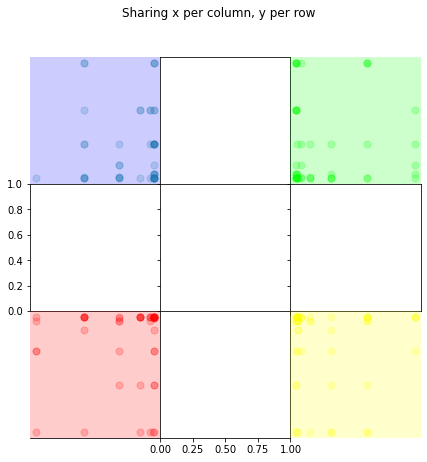

In [ ]:
file = pd.read_excel('/content/sample_data/test.xlsx')
x1 = file['sadness']
y1 = file['effect on life']
x2 = file['anger']
y2 = file['effect on life.2']
x3 = file['excitement']
y3 = file['effect on life.3']
x4 = file['tiredness']
y4 = file['effect on life.4']
fig = plt.figure(figsize=(7, 7))
gs = fig.add_gridspec(3, 3, hspace=0, wspace=0)
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.scatter(x1, -y1, alpha = 0.2, s = 50)
ax3.scatter(-x2, -y2, alpha = 0.2, s = 50, c = '#00ff00')
ax7.scatter(x3, y3, alpha = 0.2, s = 50, c = '#ff0000')
ax9.scatter(-x4, y4, alpha = 0.2, s = 50, c = '#ffff00')

ax1.set_facecolor("#0000ff33")
ax3.set_facecolor("#00ff0033")
ax7.set_facecolor("#ff000033")
ax9.set_facecolor("#ffff0033")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['bottom'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([])
ax7.get_xaxis().set_ticks([])
ax7.get_yaxis().set_ticks([])
ax9.get_xaxis().set_ticks([])
ax9.get_yaxis().set_ticks([])

for ax in fig.get_axes():
    ax.label_outer()
    

In [ ]:
import colour
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),10))
colors

[<Color red>,
 <Color #f13600>,
 <Color #e36500>,
 <Color #d58e00>,
 <Color #c7b000>,
 <Color #a4b800>,
 <Color #72aa00>,
 <Color #459c00>,
 <Color #208e00>,
 <Color green>]

**New method of creating a graph**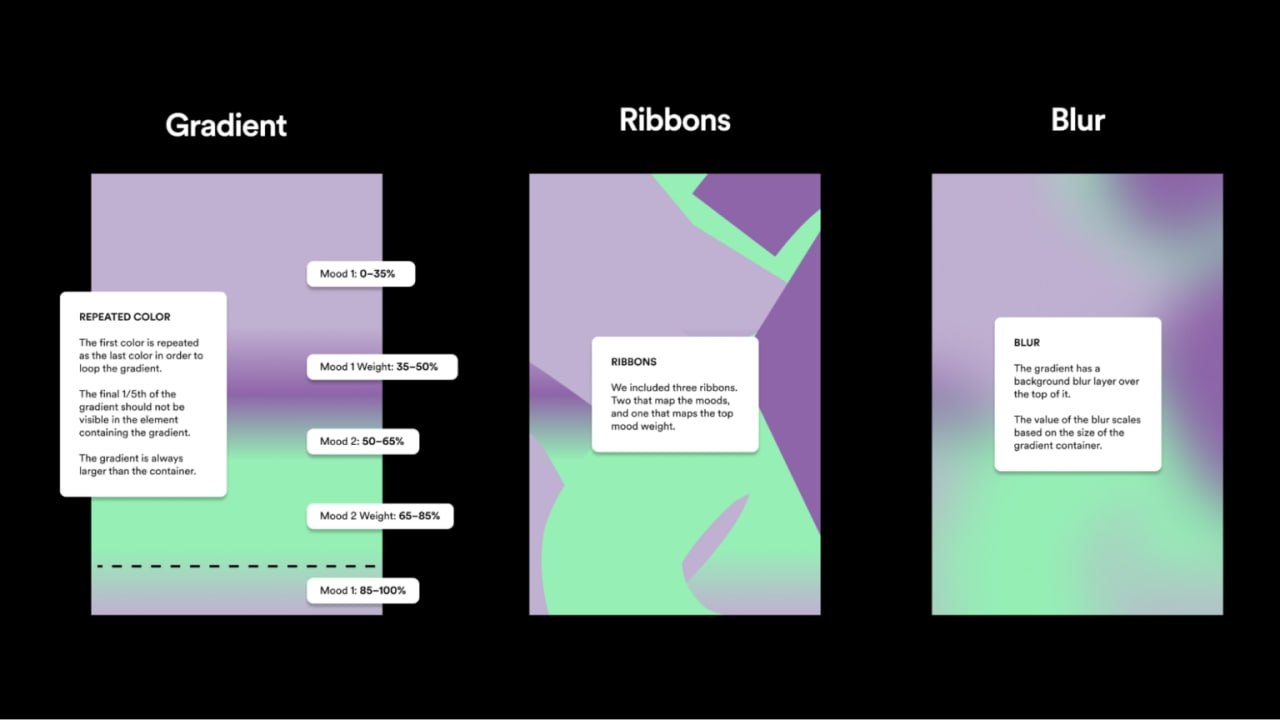

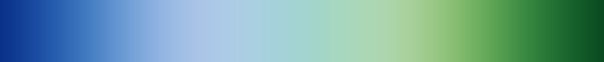

In [ ]:
import math
from PIL import Image
im = Image.new('RGB', (604, 62))
ld = im.load()

def gaussian(x, a, b, c, d=0):
    return a * math.exp(-(x - b)**2 / (2 * c**2)) + d

for x in range(im.size[0]):
    r = int(gaussian(x, 158.8242, 201, 87.0739) + gaussian(x, 158.8242, 402, 87.0739))
    g = int(gaussian(x, 129.9851, 157.7571, 108.0298) + gaussian(x, 200.6831, 399.4535, 143.6828))
    b = int(gaussian(x, 231.3135, 206.4774, 201.5447) + gaussian(x, 17.1017, 395.8819, 39.3148))
    for y in range(im.size[1]):
        ld[x, y] = (r, g, b)

im

In [ ]:
from colorsys import hls_to_rgb

def rainbow_color_stops(n=10, end=2/3):
    return [ hls_to_rgb(end * i/(n-1), 0.5, 1) for i in range(n) ]

rainbow_color_stops()

[(1.0, 0.0, 0.0),
 (1.0, 0.4444444444444444, 0.0),
 (1.0, 0.8888888888888888, 0.0),
 (0.6666666666666663, 1.0, 0.0),
 (0.22222222222222254, 1.0, 0.0),
 (0.0, 1.0, 0.2222222222222222),
 (0.0, 1.0, 0.6666666666666666),
 (0.0, 0.8888888888888888, 1.0),
 (0.0, 0.4444444444444444, 1.0),
 (0.0, 0.0, 1.0)]

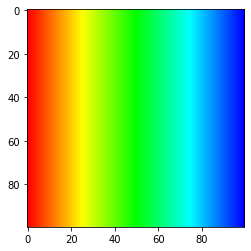

In [ ]:
import colorsys
import numpy as np
from matplotlib import pyplot as plt


def spectrum(n : int):
    hsv = [(h, 1, 1) for h in np.linspace(0, 240/360, n)]
    rgb = [colorsys.hsv_to_rgb(*tup) for tup in hsv]
    defloat = lambda x: tuple((int(255 * i) for i in x))
    return [defloat(x) for x in rgb]

if __name__ == '__main__':
    n = 100
    rgb = np.array(spectrum(n))
    rgb = rgb.reshape((1, n, 3))
    rgb = np.tile(rgb, (n, 1, 1))
    plt.imshow(rgb)
    plt.show()

<ipython-input-18-11b98ec52e1f>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


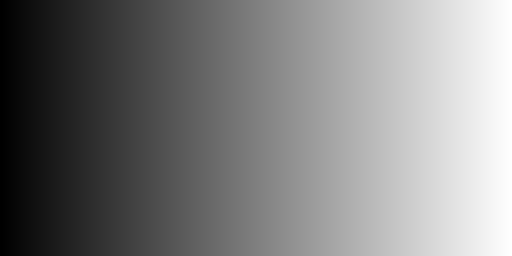

In [ ]:
from PIL import Image

def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=np.float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)

    return result


array = get_gradient_3d(512, 256, (0, 0, 0), (255, 255, 255), (True, True, True))
#Image.fromarray(np.uint8(array)).save('/content/sample_data/test.jpg', quality=95)
Image.fromarray(np.uint8(array))


In [ ]:
pip install sctriangulate

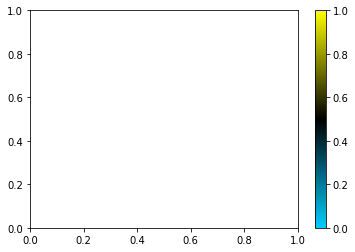

In [ ]:
from matplotlib import colors
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm

def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdict = {
    'red':((0.0, 0.0, 0.0),
           (0.5, 0.0, 0.0),
           (1.0, 1.0, 1.0)),
    'green':((0.0, 0.8, 0.8),
             (0.5, 0.0, 0.0),
             (1.0, 1.0, 1.0)),
    'blue':((0.0, 1.0, 1.0),
            (0.5, 0.0, 0.0),
            (1.0, 0.0, 0.0))
        
}

new_cmap = colors.LinearSegmentedColormap('new_cmap',segmentdata=cdict)

fig,ax = plt.subplots()
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(),cmap=new_cmap),ax=ax)

